In [29]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

from collections import Counter

In [30]:
# Import data
with open('/Users/petrick/Desktop/fall2022/PM2.5-prediction-with-Satellite-images/sensor_locations.pkl', 'rb') as f:
    data = pickle.load(f)


In [31]:
df = pd.DataFrame(data).T.to_numpy()

In [32]:
# Determine N 
# k-means

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Text(0, 0.5, 'Variation')

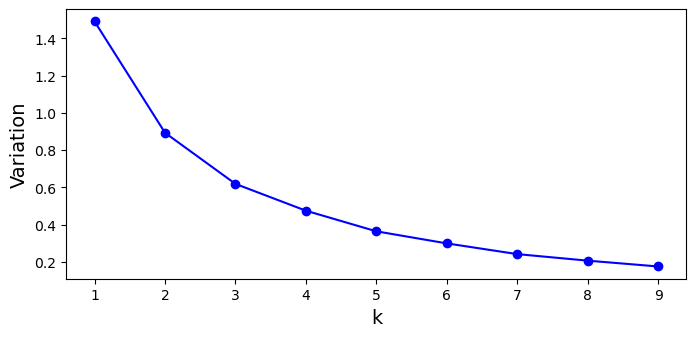

In [33]:
plt.figure(figsize=(8,3.5))
plt.plot(range(1,10),inertias,'bo-')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Variation', fontsize = 14)

# plt.annotate()
# 4 or 5 could be the best k here.

In [34]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [35]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

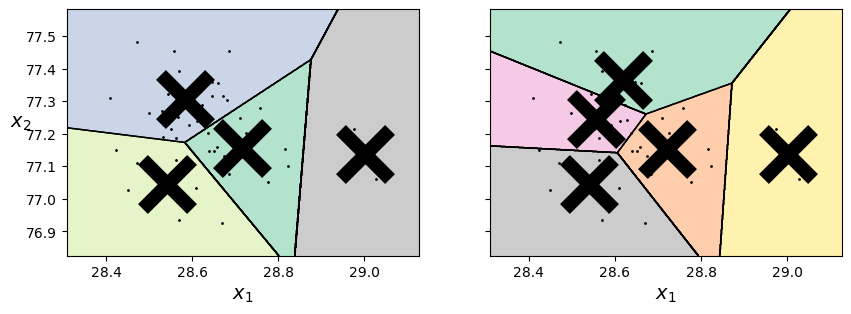

In [36]:
Kmeans_4 = KMeans(n_clusters=4, random_state=42)
Kmeans_5 = KMeans(n_clusters=5, random_state=42)
plot_clusterer_comparison(Kmeans_4, Kmeans_5, df)

In [37]:
count_4 = Counter(KMeans(n_clusters=4, random_state=42).fit(df).labels_)
count_4

Counter({3: 2, 2: 8, 0: 17, 1: 24})

In [52]:
5**(1/2)


2.23606797749979

In [38]:
count_5 = Counter(KMeans(n_clusters=5, random_state=42).fit(df).labels_)
count_5

Counter({3: 2, 4: 8, 1: 16, 2: 13, 0: 12})

In [39]:
#### 12 might be a better option here.

# Determine the distance


In [40]:
df_2 = pd.DataFrame(data).T

In [41]:
from scipy.spatial.distance import cdist
DM = cdist(df_2.values, df_2.values, 'euclidean')

In [42]:
distance = pd.DataFrame(DM).to_numpy()

In [43]:
for i in distance:
    i.sort()

## Try median 12 for cluster 5

In [50]:
distance[:,12]

array([0.35270859, 0.23333477, 0.09576856, 0.12704776, 0.09411063,
       0.17211406, 0.10973345, 0.11309205, 0.12531901, 0.24114176,
       0.18017435, 0.07911235, 0.13068593, 0.08281464, 0.09163114,
       0.11675854, 0.23979349, 0.11069987, 0.08704478, 0.22528056,
       0.19198773, 0.17903935, 0.28120474, 0.10206317, 0.10238235,
       0.09163114, 0.09671249, 0.09973104, 0.13652821, 0.11925259,
       0.13819274, 0.0964746 , 0.08746542, 0.08477871, 0.15193296,
       0.17713681, 0.19738232, 0.15909968, 0.08940593, 0.112028  ,
       0.10733933, 0.07625312, 0.10192669, 0.10495545, 0.16017738,
       0.09197259, 0.12050604, 0.10104112, 0.11359935, 0.09001773,
       0.10262716])

In [48]:
dis = [i[12] for i in distance]
dis.sort()
mean_dis = dis
mean_dis

[0.07625312387043759,
 0.07911235175368517,
 0.08281463940632995,
 0.08477871489943699,
 0.08704478215263849,
 0.08746542459737949,
 0.08940593380755461,
 0.09001772769850175,
 0.09163114154041432,
 0.09163114154041432,
 0.09197258558940104,
 0.09411063383061914,
 0.09576856373570676,
 0.09647460287557669,
 0.09671248781827584,
 0.09973103829801265,
 0.10104111737307703,
 0.10192669228421244,
 0.10206316671552242,
 0.10238234711120753,
 0.10262715625018591,
 0.10495545436041266,
 0.10733932969792845,
 0.10973344886587807,
 0.11069986540190672,
 0.11202800096404676,
 0.1130920492342451,
 0.11359935079040043,
 0.1167585375893257,
 0.11925259326320653,
 0.12050604134232301,
 0.12531900813523236,
 0.12704776188504888,
 0.13068593229571582,
 0.136528213201519,
 0.13819273859359787,
 0.15193296317784427,
 0.15909968353205442,
 0.16017738167419077,
 0.17211405636959706,
 0.1771368070164997,
 0.17903935461234144,
 0.18017434695315604,
 0.19198772590975158,
 0.19738231937030076,
 0.225280564851

## Try 17 for cluster 4

In [47]:
dis = [i[17] for i in distance]
dis.sort()
mean_dis = dis[0:4]
mean_dis

[0.09647460287557669,
 0.098953607311704,
 0.10206316671552242,
 0.10215126675670931]